In [30]:
from collections import defaultdict
from graphviz import Digraph
import os
from graphviz import Source
import matplotlib.pyplot as plt
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import math

def binStr(i,l):
    b=bin(i)
    s=str(b)
    s=s[2:]
    if(len(s)<l):
        s="0"*(l-len(s))+s
    return s

class DiGraph:
   
    def __init__(self,vertices):
        fvertices=(1<<vertices)
        self.V= fvertices 
        self.graph = defaultdict(list) 
   
    def addEdge(self,u,v):
        self.graph[u].append(v)
    
    def DeBrujin (self,fvertices):
        nmod=fvertices
        for i in range(0,fvertices):
            v=((i<<1)^1)
            self.addEdge(i,(i<<1) % nmod)
            self.addEdge(i, (v % nmod))
            
   
        
    def PrintGraph(self,n):
        dot = Digraph('G',engine="circo",format="png")
      #  for i in range(0,self.V):
      #      dot.node(binStr(i,n),pos=str(i*2)+","+str(round(i/4))+"!")
        dot.attr(overlap="False",splines="True")
        for i in range(0,len(self.graph)):
            for j in self.graph[i]:
                dot.edge(binStr(i,n),binStr(j,n))#label=binStr(i,n)+str((j>>0)&1)
        dot.view()
        

def isSubArray(A, B):
     
    n=len(A)
    m=len(B)
    i = 0
    j = 0
 
    while (i < n and j < m):
 
        if (A[i] == B[j]):
            i += 1
            j += 1
            if (j == m):
                return True;

        else:
            i = i - j + 1
            j = 0
         
    return False;        
        
def findCircle(adj,vert):
    edge_count = dict()
  
    for i in range(len(adj)):
        edge_count[i] = len(adj[i])

    curr_path = []
    circuit = []
    
    for i in range(0,len(vert)-1):
        if(not(vert[i+1] in adj[vert[i]])):
            print("your path does not exist")
            return 
    for v in range(0,len(vert)-1):
        curr_path.append(vert[v])
        edge_count[vert[v]] -= 1
        adj[vert[v]].remove(vert[v+1])  
    curr_v=vert[-1]
    
    while len(curr_path):
        if edge_count[curr_v]:
            curr_path.append(curr_v)
            next_v = adj[curr_v][-1]
            edge_count[curr_v] -= 1
            adj[curr_v].pop()
            curr_v = next_v
        else:
            circuit.append(curr_v)
            curr_v = curr_path[-1]
            curr_path.pop()
    circuit.append(vert[0])
    
    if(not(isSubArray(circuit,vert[::-1]))):
        print("there are no circle using current path")
        return 
    return circuit
def printCircle(circuit,n):
    
    for i in range(len(circuit) - 1, -1, -1):
        print(binStr(circuit[i],n), end = "")
        if i:
            print(" -> ", end = "")
    print()
            
def printSequence(cir):
    for i in cir:
        print((i>>0&1),end="")
    print()

0000 -> 0001 -> 0011 -> 0111 -> 1111 -> 1111 -> 1110 -> 1101 -> 1011 -> 0111 -> 1110 -> 1100 -> 1001 -> 0011 -> 0110 -> 1101 -> 1010 -> 0101 -> 1011 -> 0110 -> 1100 -> 1000 -> 0001 -> 0010 -> 0101 -> 1010 -> 0100 -> 1001 -> 0010 -> 0100 -> 1000 -> 0000 -> 0000
000001001010001101011001110111110


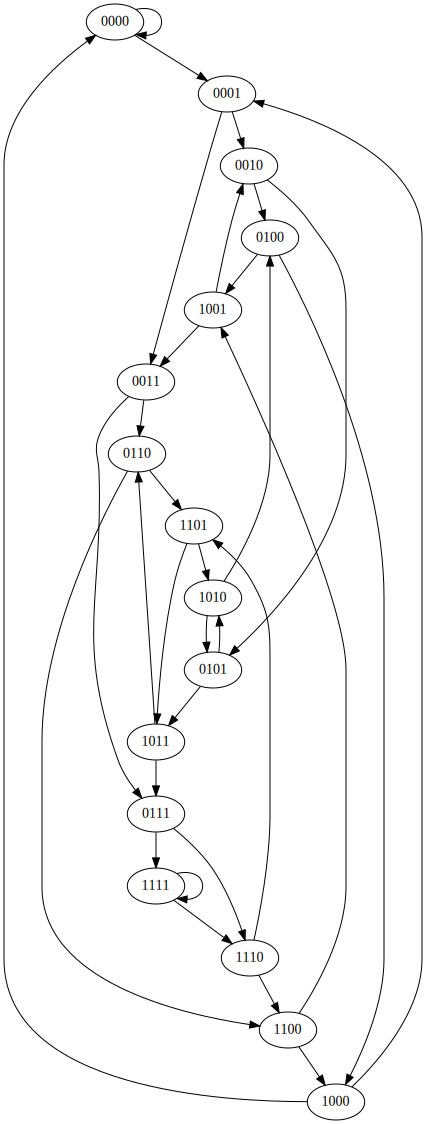

In [32]:
n = 4
d = DiGraph(n)
d.DeBrujin(1<<n)
d.PrintGraph(n)
cir=findCircle(d.graph,[0,1,3])
printCircle(cir,n)
printSequence(cir)
Source.from_file('G.gv')